In [40]:
import networkx as nx
import copy
from operator import itemgetter
import math
import matplotlib.pyplot as plt

In [3]:
G2 =  nx.read_edgelist('./facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
G2

Graph with 4039 nodes and 88234 edges


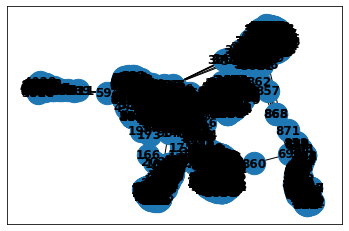

In [41]:
print(G2)
nx.draw_networkx(G2, with_labels=True, font_weight='bold', node_size=500)
# plt.savefig("G2.png")

In [5]:
# checking the connected components
# will return 1(graph has no outlier components)
noOfComponents = nx.number_connected_components(G2)
noOfComponents

1

In [6]:
# initializing nodes
for x in G2.nodes.data():
  G2.nodes[x[0]]['shell_no'] = -1
  G2.nodes[x[0]]['visited'] = False
  G2.nodes[x[0]]['noOfNeigh'] = -1
  G2.nodes[x[0]]['listOfNeigh'] = []

In [7]:
for x in G2.nodes.data():
  listOfNeighOfX0 = [n for n in G2[x[0]]]
  G2.nodes[x[0]]['noOfNeigh'] = len(listOfNeighOfX0)
  G2.nodes[x[0]]['listOfNeigh'] = listOfNeighOfX0
# G2.nodes.data()

In [8]:
# for automatic way
H4 = copy.deepcopy(G2)

In [ ]:
# returns the core number for each node(dictionary)
m1 = nx.core_number(H4)
m1

In [10]:
# updating shell_no in the actual graph G2
for x in G2.nodes.data():
  G2.nodes[x[0]]['shell_no'] = m1[x[0]]
# G2.nodes.data()

In [11]:
m2 = nx.k_shell(G2, 109)
m2.nodes.data()

NodeDataView({2506: {'shell_no': 109, 'visited': False, 'noOfNeigh': 124, 'listOfNeigh': [1912, 1918, 1925, 1943, 1946, 1962, 1963, 1966, 1971, 1979, 1983, 1984, 1985, 1986, 1993, 1997, 2005, 2020, 2030, 2033, 2037, 2040, 2043, 2045, 2046, 2055, 2056, 2059, 2060, 2064, 2073, 2078, 2083, 2084, 2088, 2090, 2098, 2104, 2108, 2109, 2112, 2123, 2131, 2137, 2140, 2142, 2172, 2188, 2190, 2200, 2201, 2206, 2213, 2218, 2229, 2233, 2234, 2240, 2244, 2257, 2261, 2262, 2266, 2275, 2276, 2278, 2290, 2299, 2300, 2309, 2323, 2324, 2329, 2331, 2339, 2340, 2347, 2348, 2352, 2359, 2369, 2374, 2376, 2395, 2404, 2414, 2423, 2460, 2462, 2464, 2468, 2492, 2499, 2500, 2507, 2520, 2521, 2526, 2542, 2543, 2550, 2551, 2553, 2560, 2561, 2573, 2574, 2575, 2576, 2579, 2590, 2593, 2600, 2601, 2602, 2604, 2607, 2611, 2615, 2619, 2624, 2625, 2630, 2631]}, 2579: {'shell_no': 109, 'visited': False, 'noOfNeigh': 116, 'listOfNeigh': [1912, 1917, 1918, 1925, 1938, 1943, 1962, 1966, 1971, 1983, 1985, 1986, 1993, 2020, 2043

In [19]:
m3 = nx.k_core(G2)
core_node_no = len(m3.nodes.data())
# the core is shell number 115

In [12]:
# creating a list of lists of dictionaries {node_no: no_of_neighbors}
bucketList = []
for i in range(116):
  bucketList.append([])
# print(bucketList)

for key in m1:
  current_shell_no = G2.nodes[key]['shell_no']
  current_no_neighbours = G2.nodes[key]['noOfNeigh']
  bucketList[current_shell_no].append({ "node_no": key, "noOfNeigh": current_no_neighbours })

print(bucketList)


[[], [{'node_no': 11, 'noOfNeigh': 1}, {'node_no': 12, 'noOfNeigh': 1}, {'node_no': 15, 'noOfNeigh': 1}, {'node_no': 18, 'noOfNeigh': 1}, {'node_no': 37, 'noOfNeigh': 1}, {'node_no': 43, 'noOfNeigh': 1}, {'node_no': 74, 'noOfNeigh': 1}, {'node_no': 114, 'noOfNeigh': 1}, {'node_no': 209, 'noOfNeigh': 1}, {'node_no': 210, 'noOfNeigh': 1}, {'node_no': 215, 'noOfNeigh': 1}, {'node_no': 287, 'noOfNeigh': 1}, {'node_no': 292, 'noOfNeigh': 1}, {'node_no': 335, 'noOfNeigh': 1}, {'node_no': 911, 'noOfNeigh': 1}, {'node_no': 918, 'noOfNeigh': 1}, {'node_no': 1096, 'noOfNeigh': 1}, {'node_no': 1119, 'noOfNeigh': 1}, {'node_no': 1145, 'noOfNeigh': 1}, {'node_no': 1206, 'noOfNeigh': 1}, {'node_no': 1386, 'noOfNeigh': 1}, {'node_no': 1466, 'noOfNeigh': 1}, {'node_no': 1560, 'noOfNeigh': 1}, {'node_no': 1581, 'noOfNeigh': 1}, {'node_no': 1834, 'noOfNeigh': 1}, {'node_no': 358, 'noOfNeigh': 1}, {'node_no': 447, 'noOfNeigh': 1}, {'node_no': 550, 'noOfNeigh': 1}, {'node_no': 585, 'noOfNeigh': 1}, {'node

In [13]:
# confirming value of bucketList's lists
print(bucketList[21])

[{'node_no': 0, 'noOfNeigh': 347}, {'node_no': 9, 'noOfNeigh': 57}, {'node_no': 13, 'noOfNeigh': 31}, {'node_no': 21, 'noOfNeigh': 65}, {'node_no': 25, 'noOfNeigh': 69}, {'node_no': 26, 'noOfNeigh': 68}, {'node_no': 40, 'noOfNeigh': 44}, {'node_no': 56, 'noOfNeigh': 78}, {'node_no': 67, 'noOfNeigh': 76}, {'node_no': 98, 'noOfNeigh': 49}, {'node_no': 104, 'noOfNeigh': 32}, {'node_no': 109, 'noOfNeigh': 37}, {'node_no': 113, 'noOfNeigh': 40}, {'node_no': 118, 'noOfNeigh': 36}, {'node_no': 119, 'noOfNeigh': 62}, {'node_no': 122, 'noOfNeigh': 63}, {'node_no': 128, 'noOfNeigh': 28}, {'node_no': 142, 'noOfNeigh': 43}, {'node_no': 169, 'noOfNeigh': 38}, {'node_no': 170, 'noOfNeigh': 46}, {'node_no': 172, 'noOfNeigh': 41}, {'node_no': 186, 'noOfNeigh': 44}, {'node_no': 188, 'noOfNeigh': 48}, {'node_no': 199, 'noOfNeigh': 47}, {'node_no': 200, 'noOfNeigh': 57}, {'node_no': 203, 'noOfNeigh': 57}, {'node_no': 211, 'noOfNeigh': 30}, {'node_no': 223, 'noOfNeigh': 27}, {'node_no': 239, 'noOfNeigh': 

In [14]:
bucketListSorted = []

# sorting the bucketList's lists one by one by their no of neighbors in descending order
for list in bucketList:
  newList = sorted(list, key=itemgetter('noOfNeigh'), reverse=True)
  bucketListSorted.append(newList)

print(bucketListSorted)




[[], [{'node_no': 11, 'noOfNeigh': 1}, {'node_no': 12, 'noOfNeigh': 1}, {'node_no': 15, 'noOfNeigh': 1}, {'node_no': 18, 'noOfNeigh': 1}, {'node_no': 37, 'noOfNeigh': 1}, {'node_no': 43, 'noOfNeigh': 1}, {'node_no': 74, 'noOfNeigh': 1}, {'node_no': 114, 'noOfNeigh': 1}, {'node_no': 209, 'noOfNeigh': 1}, {'node_no': 210, 'noOfNeigh': 1}, {'node_no': 215, 'noOfNeigh': 1}, {'node_no': 287, 'noOfNeigh': 1}, {'node_no': 292, 'noOfNeigh': 1}, {'node_no': 335, 'noOfNeigh': 1}, {'node_no': 911, 'noOfNeigh': 1}, {'node_no': 918, 'noOfNeigh': 1}, {'node_no': 1096, 'noOfNeigh': 1}, {'node_no': 1119, 'noOfNeigh': 1}, {'node_no': 1145, 'noOfNeigh': 1}, {'node_no': 1206, 'noOfNeigh': 1}, {'node_no': 1386, 'noOfNeigh': 1}, {'node_no': 1466, 'noOfNeigh': 1}, {'node_no': 1560, 'noOfNeigh': 1}, {'node_no': 1581, 'noOfNeigh': 1}, {'node_no': 1834, 'noOfNeigh': 1}, {'node_no': 358, 'noOfNeigh': 1}, {'node_no': 447, 'noOfNeigh': 1}, {'node_no': 550, 'noOfNeigh': 1}, {'node_no': 585, 'noOfNeigh': 1}, {'node

In [24]:
# bucket list has been sorted
print(bucketListSorted[115])

[{'node_no': 1912, 'noOfNeigh': 755}, {'node_no': 2543, 'noOfNeigh': 294}, {'node_no': 2347, 'noOfNeigh': 291}, {'node_no': 2266, 'noOfNeigh': 234}, {'node_no': 1985, 'noOfNeigh': 224}, {'node_no': 2233, 'noOfNeigh': 222}, {'node_no': 2142, 'noOfNeigh': 221}, {'node_no': 2206, 'noOfNeigh': 210}, {'node_no': 2229, 'noOfNeigh': 207}, {'node_no': 2410, 'noOfNeigh': 207}, {'node_no': 2611, 'noOfNeigh': 207}, {'node_no': 2218, 'noOfNeigh': 205}, {'node_no': 2078, 'noOfNeigh': 204}, {'node_no': 1993, 'noOfNeigh': 203}, {'node_no': 2123, 'noOfNeigh': 203}, {'node_no': 2464, 'noOfNeigh': 202}, {'node_no': 2240, 'noOfNeigh': 201}, {'node_no': 2507, 'noOfNeigh': 201}, {'node_no': 2560, 'noOfNeigh': 201}, {'node_no': 2244, 'noOfNeigh': 200}, {'node_no': 1983, 'noOfNeigh': 199}, {'node_no': 2309, 'noOfNeigh': 199}, {'node_no': 2088, 'noOfNeigh': 198}, {'node_no': 2131, 'noOfNeigh': 198}, {'node_no': 2340, 'noOfNeigh': 198}, {'node_no': 2602, 'noOfNeigh': 198}, {'node_no': 2324, 'noOfNeigh': 197}, 

In [23]:
# seed selection and simulation with independent cascade model
# core_node_no
# 5% of nodes from core and 5% from the periphery
core_seed_no = math.floor((5/100)*core_node_no)
seed_nodes_core = []

for i in range(core_seed_no):
  seed_nodes_core.append(bucketListSorted[115][i])

seed_nodes_core

[{'node_no': 1912, 'noOfNeigh': 755},
 {'node_no': 2543, 'noOfNeigh': 294},
 {'node_no': 2347, 'noOfNeigh': 291},
 {'node_no': 2266, 'noOfNeigh': 234},
 {'node_no': 1985, 'noOfNeigh': 224},
 {'node_no': 2233, 'noOfNeigh': 222},
 {'node_no': 2142, 'noOfNeigh': 221}]

In [25]:
k = core_seed_no
seed_nodes_periphery = []
for i in reversed(range(115)):
  if k == 0:
    break
  if len(bucketListSorted[i]) == 0:
    continue
  else:
    seed_nodes_periphery.append(bucketListSorted[i][0])
    k = k - 1

seed_nodes_periphery

[{'node_no': 2575, 'noOfNeigh': 141},
 {'node_no': 2556, 'noOfNeigh': 131},
 {'node_no': 2165, 'noOfNeigh': 128},
 {'node_no': 2084, 'noOfNeigh': 141},
 {'node_no': 2506, 'noOfNeigh': 124},
 {'node_no': 2477, 'noOfNeigh': 113},
 {'node_no': 2306, 'noOfNeigh': 113}]

In [ ]:
H6 = copy.deepcopy(G2)
H6.nodes.data()

In [ ]:
# independent cascade from the seed set formed in case1
